#**Project Name: Sales Forecasting for Furniture Store**

**Problem Statement:**

For a retail furniture store, predicting future sales is critical to avoiding inventory issues like overstocking
or under-stocking. The challenge lies in utilizing time series data from the superstore dataset to forecast
furniture sales for the next year accurately. This predictive insight ensures an optimal customer
experience, avoids losses, and maintains store sustainability.

**Understanding Data**

In [ ]:
import pandas as pd
import numpy as np      # importing necessary libraries

In [ ]:
!iconv -f latin1 -t utf8 "/content/drive/MyDrive/Super_Store_data.csv" > "/content/drive/MyDrive/Super_Store_data_utf8.csv"

In [ ]:
dff = pd.read_csv("/content/drive/MyDrive/Super_Store_data_utf8.csv")

In [ ]:
dff.head(2)

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.96,2,0.0,41.9136
1,2,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.94,3,0.0,219.5820


In [ ]:
dff.shape   # there are 2121 rows and 21 columns

(2121, 21)

In [ ]:
dff.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2121 entries, 0 to 2120
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row ID         2121 non-null   int64  
 1   Order ID       2121 non-null   object 
 2   Order Date     2121 non-null   object 
 3   Ship Date      2121 non-null   object 
 4   Ship Mode      2121 non-null   object 
 5   Customer ID    2121 non-null   object 
 6   Customer Name  2121 non-null   object 
 7   Segment        2121 non-null   object 
 8   Country        2121 non-null   object 
 9   City           2121 non-null   object 
 10  State          2121 non-null   object 
 11  Postal Code    2121 non-null   int64  
 12  Region         2121 non-null   object 
 13  Product ID     2121 non-null   object 
 14  Category       2121 non-null   object 
 15  Sub-Category   2121 non-null   object 
 16  Product Name   2121 non-null   object 
 17  Sales          2121 non-null   float64
 18  Quantity

In [ ]:
dff.describe()               # all the statistical values for all the numerical columns

,Row ID,Postal Code,Sales,Quantity,Discount,Profit
count,2121.000000,2121.000000,2121.000000,2121.000000,2121.000000,2121.000000
mean,5041.643564,55726.556341,349.834887,3.785007,0.173923,8.699327
std,2885.740258,32261.888225,503.179145,2.251620,0.181547,136.049246
min,1.000000,1040.000000,1.892000,1.000000,0.000000,-1862.312400
25%,2568.000000,22801.000000,47.040000,2.000000,0.000000,-12.849000
50%,5145.000000,60505.000000,182.220000,3.000000,0.200000,7.774800
75%,7534.000000,90032.000000,435.168000,5.000000,0.300000,33.726600
max,9991.000000,99301.000000,4416.174000,14.000000,0.700000,1013.127000


In [ ]:
dff["Order Date"].nunique()

889

In [ ]:
dff["Ship Date"].nunique()      # can't be dropped as there are many values present

960

In [ ]:
dff["Ship Date"].min()

'1/1/2015'

In [ ]:
dff["Ship Mode"].unique()      # can't be dropped as there are many values present

array(['Second Class', 'Standard Class', 'First Class', 'Same Day'],
      dtype=object)

In [ ]:
dff["Segment"].unique()         # can't be dropped as there are many values present

array(['Consumer', 'Corporate', 'Home Office'], dtype=object)

In [ ]:
dff["Country"].unique()    # can be dropped as there is only one country present

array(['United States'], dtype=object)

In [ ]:
dff["City"].nunique()     # can't be dropped as there are many values present

371

In [ ]:
dff["State"].nunique()    # can't be dropped as there are many values present

48

In [ ]:
dff["Category"].unique()          # can be dropped as there is only one category

array(['Furniture'], dtype=object)

In [ ]:
dff["Sub-Category"].unique()      # can't be dropped as there are different sub categories

array(['Bookcases', 'Chairs', 'Tables', 'Furnishings'], dtype=object)

In [ ]:
dff["Product Name"].nunique()      # can't be dropped as there are many unique values

380

In [ ]:
dff["Region"].unique()    # can't be dropped as there are many unique values

array(['South', 'West', 'East', 'Central'], dtype=object)

In [ ]:
# after dropping the insignificant columns from original datframe (dff), it is stored in the new data frame "df"
df = dff.drop(columns={"Row ID","Order ID","Customer ID","Customer Name","Postal Code","Product ID","Country","Category"})

In [ ]:
df.head(2)

In [ ]:
df.shape

(2121, 13)

###**Histograms for Numerical data**

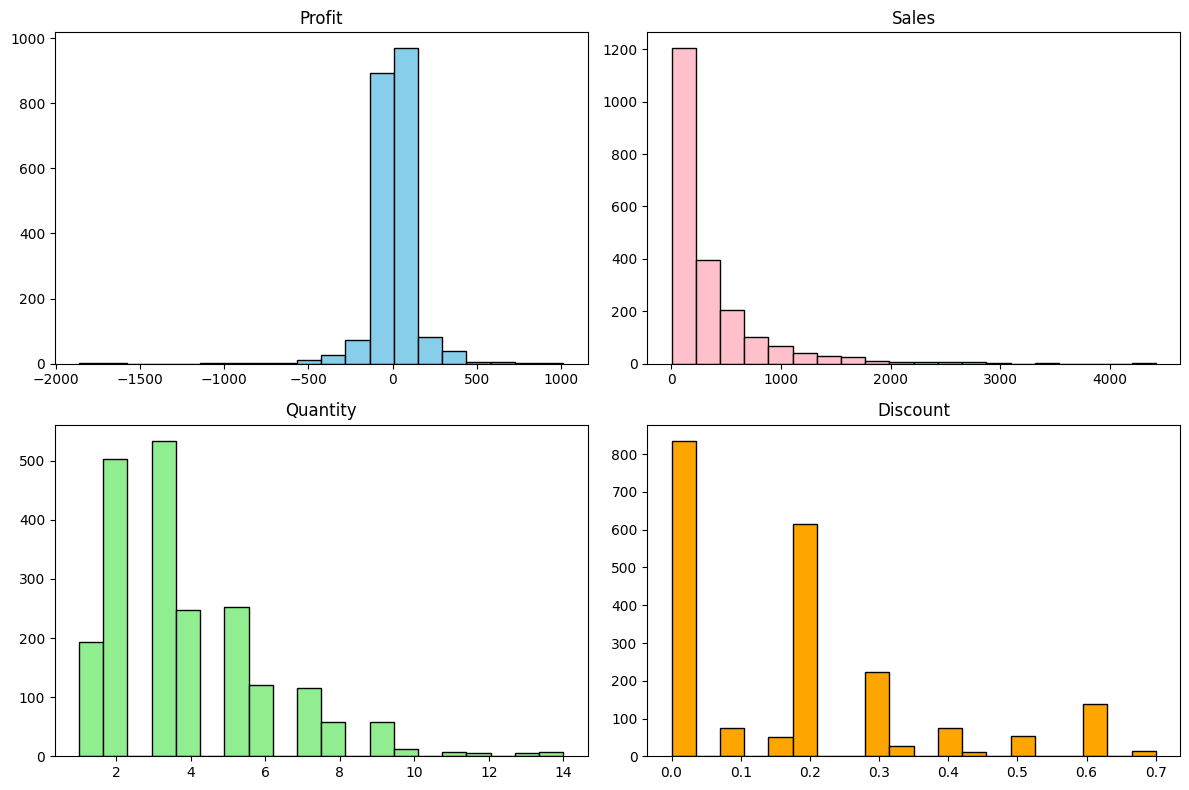

In [ ]:
import matplotlib.pyplot as plt

# Create a figure and axis for subplots
fig, axs = plt.subplots(2, 2, figsize=(12, 8))

# Plot histograms for Profit, Sales, Quantity, and Discount
axs[0, 0].hist(df['Profit'], bins=20, color='skyblue', edgecolor='black')
axs[0, 0].set_title('Profit')
axs[0, 1].hist(df['Sales'], bins=20, color='pink', edgecolor='black')
axs[0, 1].set_title('Sales')
axs[1, 0].hist(df['Quantity'], bins=20, color='lightgreen', edgecolor='black')
axs[1, 0].set_title('Quantity')
axs[1, 1].hist(df['Discount'], bins=20, color='orange', edgecolor='black')
axs[1, 1].set_title('Discount')

# Adjust layout
plt.tight_layout()

# Show plot
plt.show()


###**Categorical columns vs Sales**

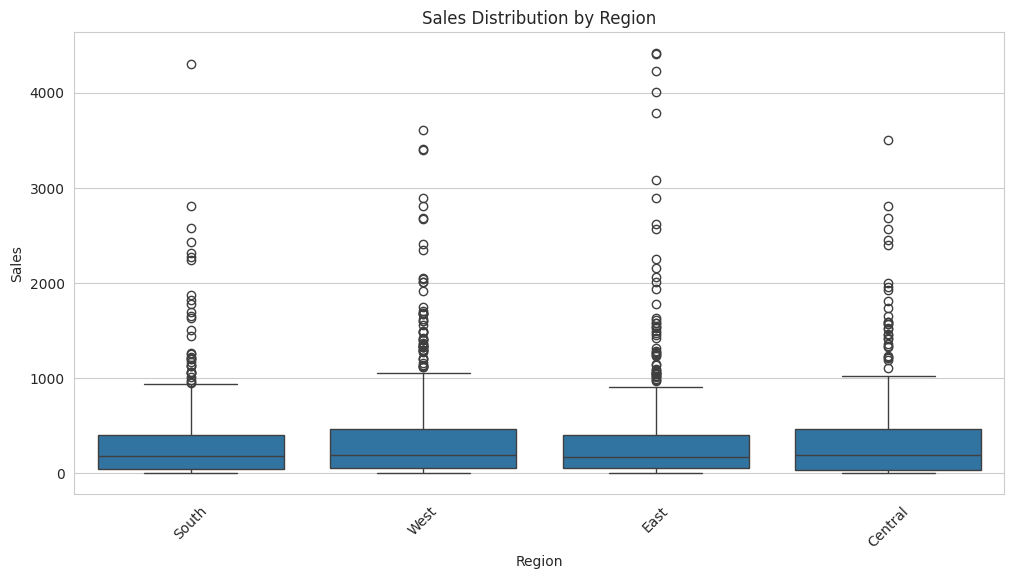

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set the style of seaborn
sns.set_style("whitegrid")

# Create a box plot for Region
plt.figure(figsize=(12, 6))
sns.boxplot(x='Region', y='Sales', data=df)
plt.title('Sales Distribution by Region')
plt.xlabel('Region')
plt.ylabel('Sales')
plt.xticks(rotation=45)
plt.show()


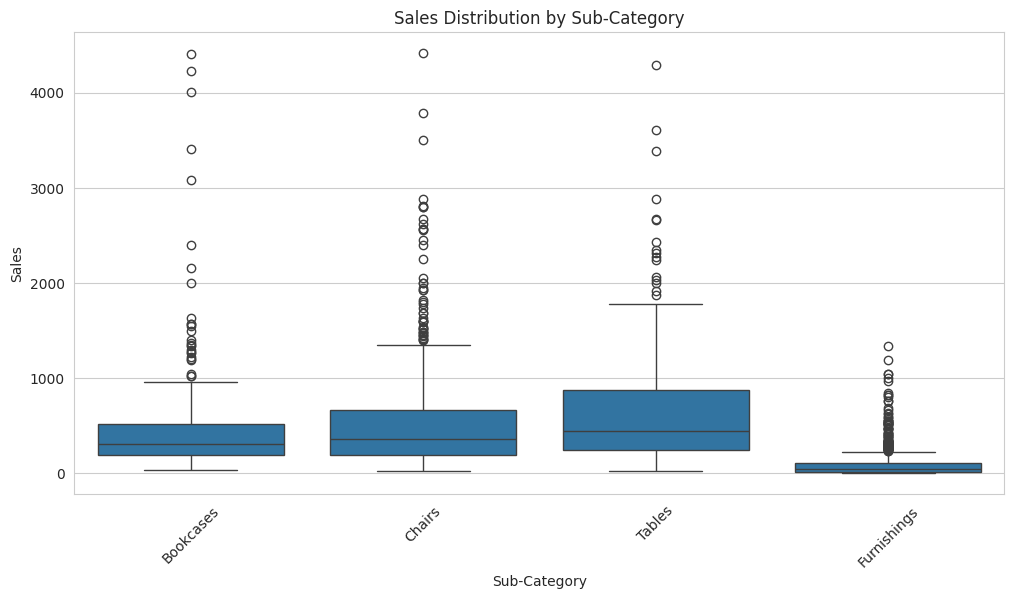

In [ ]:
# Create a box plot for Sub-Category
plt.figure(figsize=(12, 6))
sns.boxplot(x='Sub-Category', y='Sales', data=df)
plt.title('Sales Distribution by Sub-Category')
plt.xlabel('Sub-Category')
plt.ylabel('Sales')
plt.xticks(rotation=45)
plt.show()

<ipython-input-54-ebbb541a1301>:6: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='State', y='Sales', data=df, ci=None)


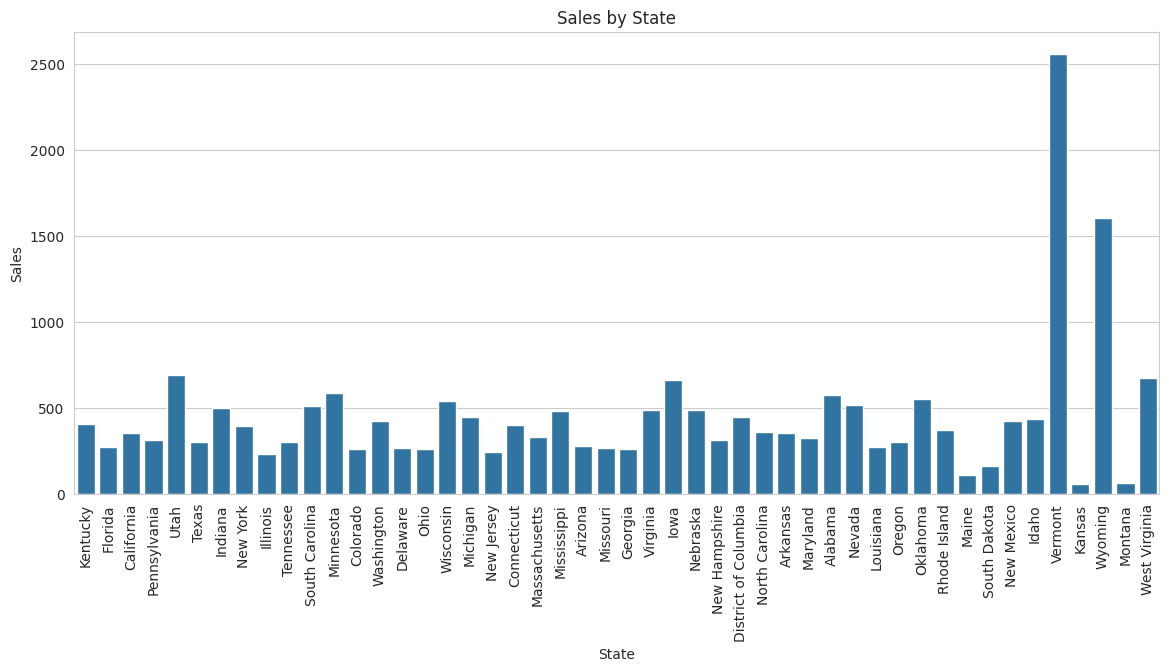

In [ ]:
# Set the style of seaborn
sns.set_style("whitegrid")

# Create a bar plot for State vs Sales
plt.figure(figsize=(14, 6))
sns.barplot(x='State', y='Sales', data=df, ci=None)
plt.title('Sales by State')
plt.xlabel('State')
plt.ylabel('Sales')
plt.xticks(rotation=90)
plt.show()

<Figure size 1200x800 with 0 Axes>

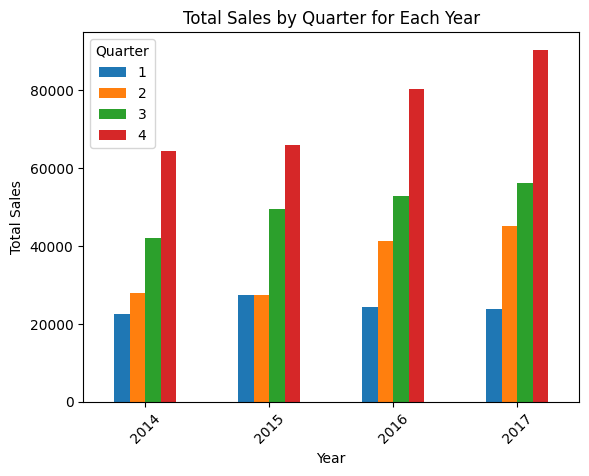

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Convert 'Order Date' column to datetime if it's not already
df['Order Date'] = pd.to_datetime(df['Order Date'])

# Extract year and quarter information from 'Order Date' and create new columns
df['Year'] = df['Order Date'].dt.year
df['Quarter'] = df['Order Date'].dt.quarter

# Group by 'Year' and 'Quarter' and calculate the total sales for each quarter in each year
yearly_quarterly_sales = df.groupby(['Year', 'Quarter'])['Sales'].sum().unstack()

# Plot the quarterly sales for each year
plt.figure(figsize=(12, 8))
yearly_quarterly_sales.plot(kind='bar', stacked=False)
plt.title('Total Sales by Quarter for Each Year')
plt.xlabel('Year')
plt.ylabel('Total Sales')
plt.xticks(rotation=45)  # Rotate x-axis labels if needed
plt.legend(title='Quarter')
plt.show()


<ipython-input-57-9812472dfa3f>:6: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='Segment', y='Sales', data=df, ci=None)


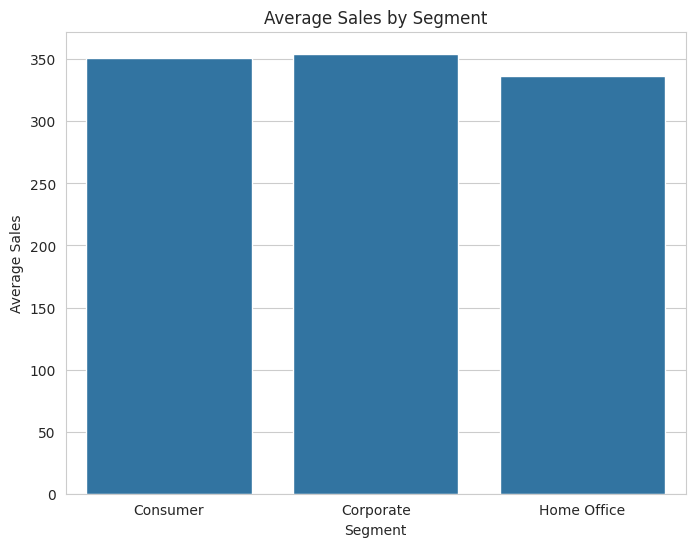

In [ ]:

# Set the style of seaborn
sns.set_style("whitegrid")

# Create a bar plot for Segment vs Sales
plt.figure(figsize=(8, 6))
sns.barplot(x='Segment', y='Sales', data=df, ci=None)
plt.title('Average Sales by Segment')
plt.xlabel('Segment')
plt.ylabel('Average Sales')
plt.show()


<ipython-input-9-0ca75f16ef46>:5: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(),annot=True)


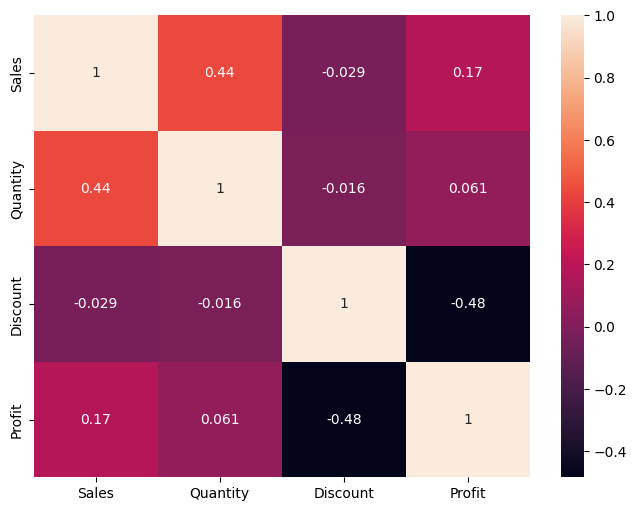

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8,6))
sns.heatmap(df.corr(),annot=True)
plt.show()

In [ ]:
import warnings
import itertools
import pandas as pd                     # importing all necessary librares for forecasting and analysis
import numpy as np
import statsmodels.api as sm

In [ ]:
import matplotlib
import matplotlib.pyplot as plt
warnings.filterwarnings("ignore")
plt.style.use('fivethirtyeight')
matplotlib.rcParams['axes.labelsize']=14
matplotlib.rcParams['xtick.labelsize']=12
matplotlib.rcParams['ytick.labelsize']=12
matplotlib.rcParams['text.color']='k'

###**Dropping off all columns except Order Date and Sales for Furniture Category and saving in a new variable "df1"**

In [ ]:
df1 = df.copy()

In [ ]:
print(df1['Order Date'].min())
print(df1['Order Date'].max())

2014-01-06 00:00:00
2017-12-30 00:00:00


In [ ]:
df1 = df1.drop(columns={'Ship Date', 'Ship Mode', 'Segment', 'City', 'State',
                         'Region', 'Sub-Category', 'Product Name', 'Quantity',
                         'Discount', 'Profit', 'Year', 'Quarter'})

In [ ]:
df1.columns

Index(['Order Date', 'Sales'], dtype='object')

In [ ]:
df1.head(2)

,Order Date,Sales
0,2016-11-08,261.96
1,2016-11-08,731.94


In [ ]:
df1 = df1.sort_values('Order Date')
df1.head()

,Order Date,Sales
1577,2014-01-06,2573.820
1626,2014-01-07,76.728
181,2014-01-10,51.940
150,2014-01-11,9.940
631,2014-01-13,545.940


In [ ]:
df1 = df1.groupby("Order Date")['Sales'].sum().reset_index()

In [ ]:
df1.head()

,Order Date,Sales
0,2014-01-06,2573.820
1,2014-01-07,76.728
2,2014-01-10,51.940
3,2014-01-11,9.940
4,2014-01-13,879.939


**Setting the "Order Date as index:**

In [ ]:
df1 = df1.set_index('Order Date')

In [ ]:
df1

,Sales
Order Date,
2014-01-06,2573.8200
2014-01-07,76.7280
2014-01-10,51.9400
2014-01-11,9.9400
2014-01-13,879.9390
...,...
2017-12-24,1393.4940
2017-12-25,832.4540
2017-12-28,551.2568


In [ ]:
df1.describe()

,Sales
count,889.000000
mean,834.645439
std,1015.317163
min,1.988000
25%,173.940000
50%,493.920000
75%,1128.390000
max,10006.174000


**Re sampling from daily sales to monthly, to smoothen the data**

In [ ]:
# resampling
x = df1["Sales"].resample('MS').mean()

In [ ]:
x['2017']

Order Date
2017-01-01     397.602133
2017-02-01     528.179800
2017-03-01     544.672240
2017-04-01     453.297905
2017-05-01     678.302328
2017-06-01     826.460291
2017-07-01     562.524857
2017-08-01     857.881889
2017-09-01    1209.508583
2017-10-01     875.362728
2017-11-01    1277.817759
2017-12-01    1256.298672
Freq: MS, Name: Sales, dtype: float64

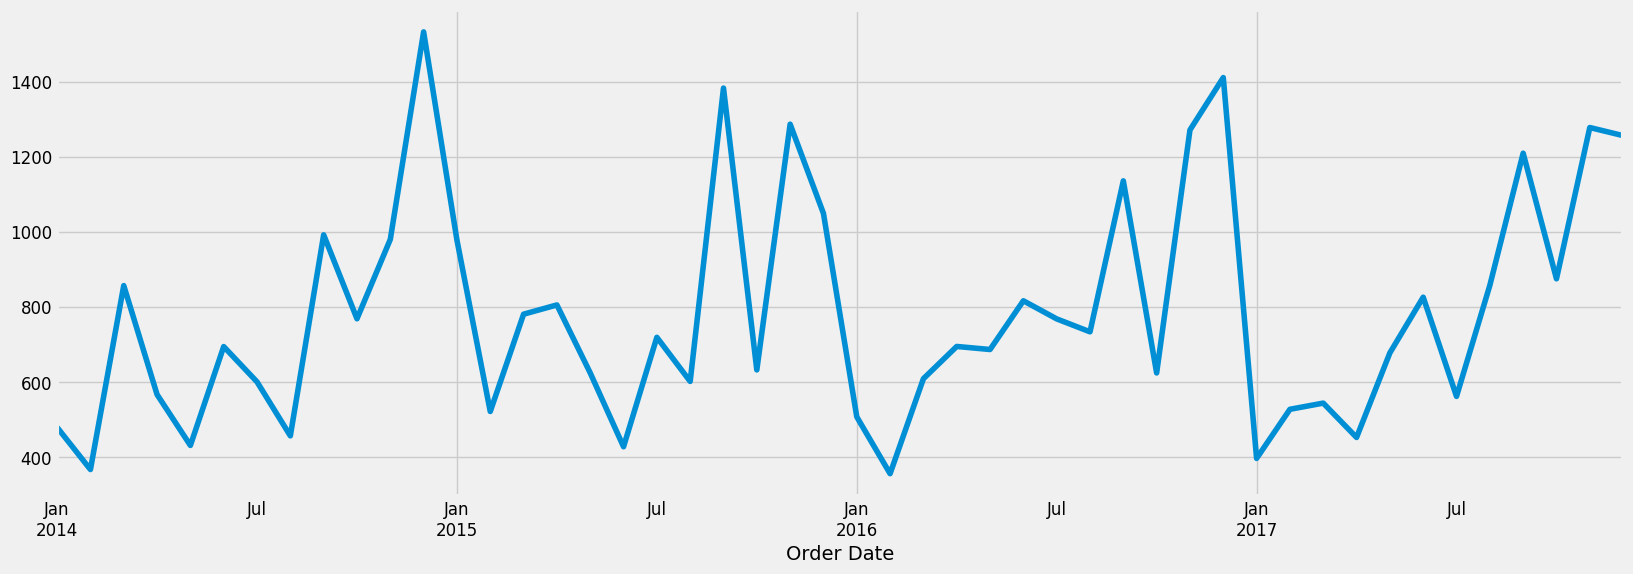

In [ ]:
# visualising the time series data
x.plot(figsize=(18,6))
plt.show()

**Seasonality:** are peaks at the end of every year, thus there is seasonality in the given data.

**Trend:** There is clearly an upward trend from the beginning of each year towards it's ending.

##**STATIONARITY CHECK**

###**1) Time Series Decomposition**

Trend, Seasonality, Residuals/noise

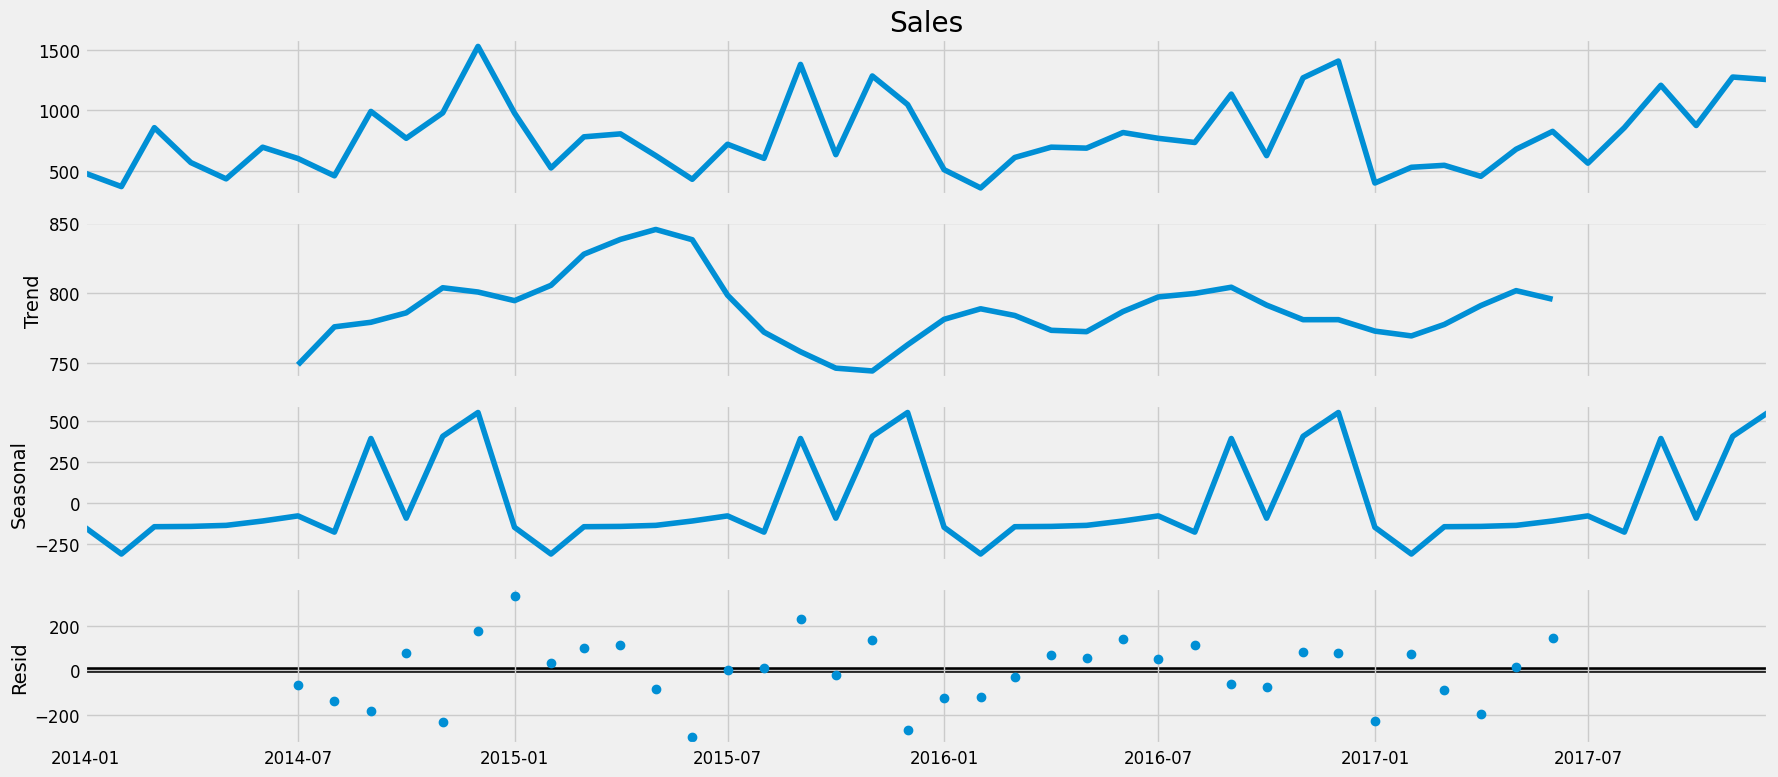

In [ ]:
from pylab import rcParams
rcParams['figure.figsize'] = 18, 8
decomposition = sm.tsa.seasonal_decompose(x, model='additive')
fig = decomposition.plot()
plt.show()

###**2) Augmented Dicky Fuller test**

**Null Hypothesis(H0):** The data is not stationary i.e., it is time-dependent.

**Alternate Hypothesis(H1):** It is stationary.


In [ ]:
# importing adfuller for testing stationarity is present or not
from statsmodels.tsa.stattools import adfuller

def test_adfuller(data):
    res=adfuller(data,maxlag=16)
    labels=['ADF Test Statistic','p-value','#Lags Used','No. of obs. used']
    for label, value in zip(labels,res):
        print(label+':'+str(value))
    if res[1]<=0.05:
        print('\nHypothesis Test Results: Reject H0, series is stationary')
    else:
        print('\nHypothesis Test Results: Failed to reject H0, series is not stationary')

# passing the series "x" in the function test_fuller
test_adfuller(x)

ADF Test Statistic:-2.4399517684865586
p-value:0.13077626604602327
#Lags Used:11
No. of obs. used:36

Hypothesis Test Results: Failed to reject H0, series is not stationary


**Trend and Seasonality:** Yearly trend with 12 months seasonality.



###**Since the series is not stationary, we will make it stationary using "Differencing Method"**

In [ ]:
# making series again into data frame
df2=pd.DataFrame(x)

In [ ]:
df2.head()

,Sales
Order Date,
2014-01-01,480.194231
2014-02-01,367.931600
2014-03-01,857.291529
2014-04-01,567.488357
2014-05-01,432.049188


In [ ]:
# taking lag as 1 i.e., shift = 1
df2['First difference']=df2['Sales']-df2['Sales'].shift(1)

# taking lag as 12 i.e., shift = 12 ie., sesonality shift
df2['First seasonal difference']=df2['Sales']-df2['Sales'].shift(12)

In [ ]:
df2.head()

,Sales,First difference,First seasonal difference
Order Date,,,
2014-01-01,480.194231,NaN,NaN
2014-02-01,367.931600,-112.262631,NaN
2014-03-01,857.291529,489.359929,NaN
2014-04-01,567.488357,-289.803172,NaN
2014-05-01,432.049188,-135.439170,NaN


In [ ]:
print(test_adfuller(df2['First difference'].dropna()))
print("\n")
print(test_adfuller(df2['First seasonal difference'].dropna()))

ADF Test Statistic:-2.3685982650220967
p-value:0.15079613103078088
#Lags Used:13
No. of obs. used:33

Hypothesis Test Results: Failed to reject H0, series is not stationary
None


ADF Test Statistic:-2.9650929157929817
p-value:0.03828538689947691
#Lags Used:16
No. of obs. used:19

Hypothesis Test Results: Reject H0, series is stationary
None


Thus with seasonality shift as 12, the series has become stationary.

###**Comparing before and after making it stationary visually:**

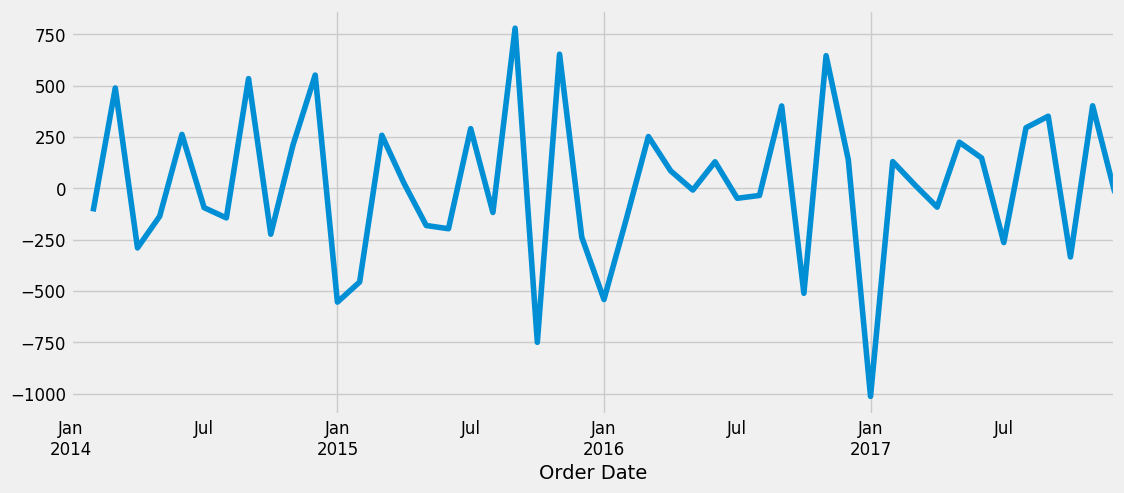

In [ ]:
rcParams['figure.figsize'] = 18, 8
df2['First difference'].plot(figsize=(12,5));

**Seasonality is still present**

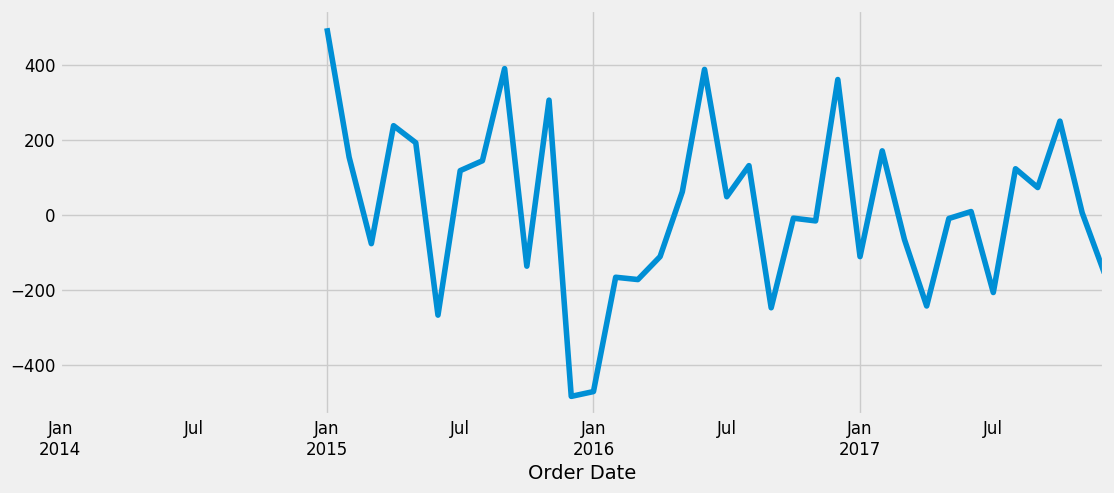

In [ ]:
rcParams['figure.figsize'] = 18, 8
df2['First seasonal difference'].plot(figsize=(12,5));

**Seasonality is no more present.**

###**Exploratory data analysis of Time series using Autocorrelation function (ACF) and Partial Autocorrelation Function (PACF)**

They help in finding p,q,d values for Autoregressive (AR) and Moving Average (MA) models.

###**For First Difference:**

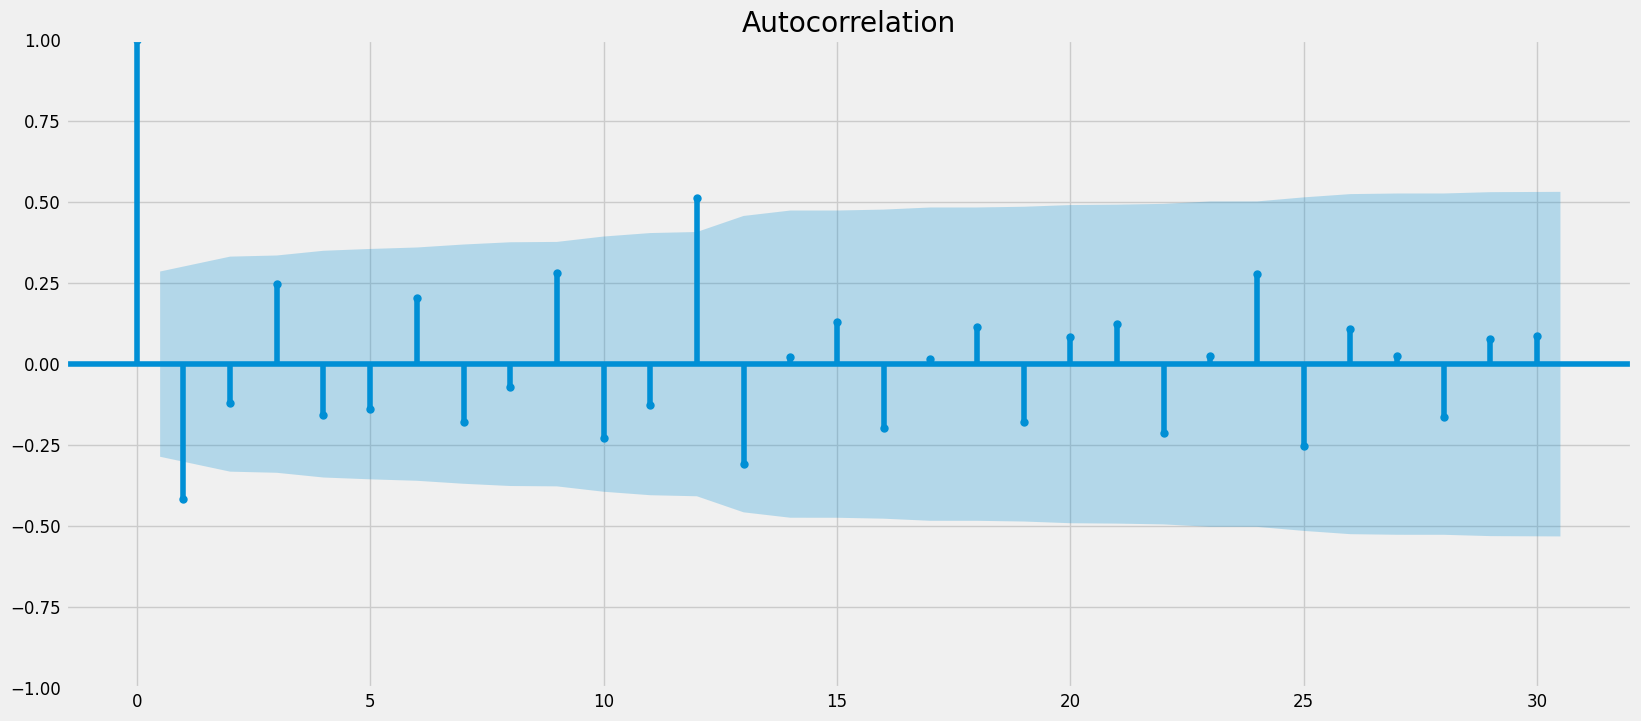

In [ ]:
sm.graphics.tsa.plot_acf(df2['First difference'].iloc[1:],lags=30);

**At point one, the value is actually crossing the darkened portion of graph**

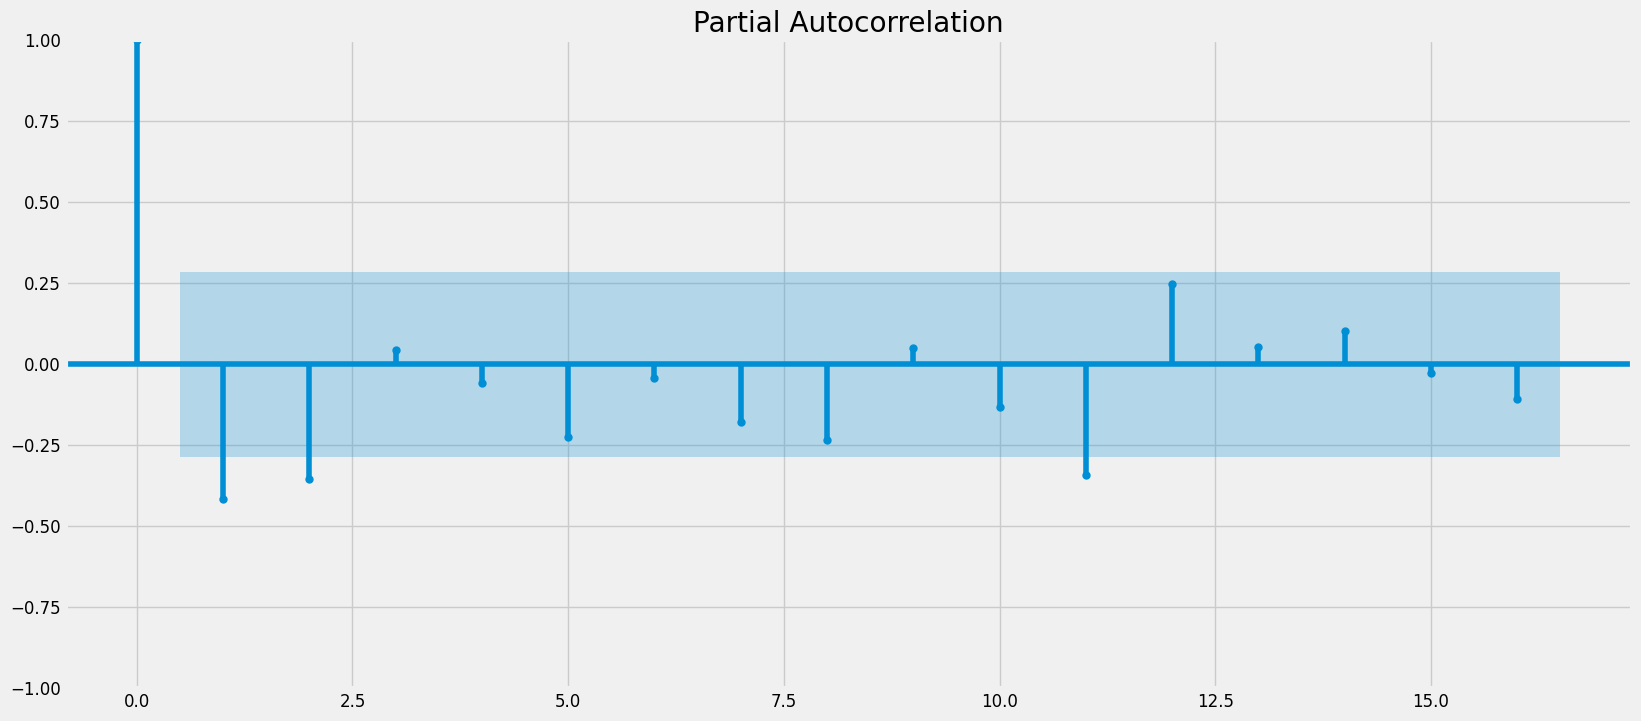

In [ ]:
sm.graphics.tsa.plot_pacf(df2['First difference'].iloc[1:],lags=16);

###**For First Seasonal Difference:**

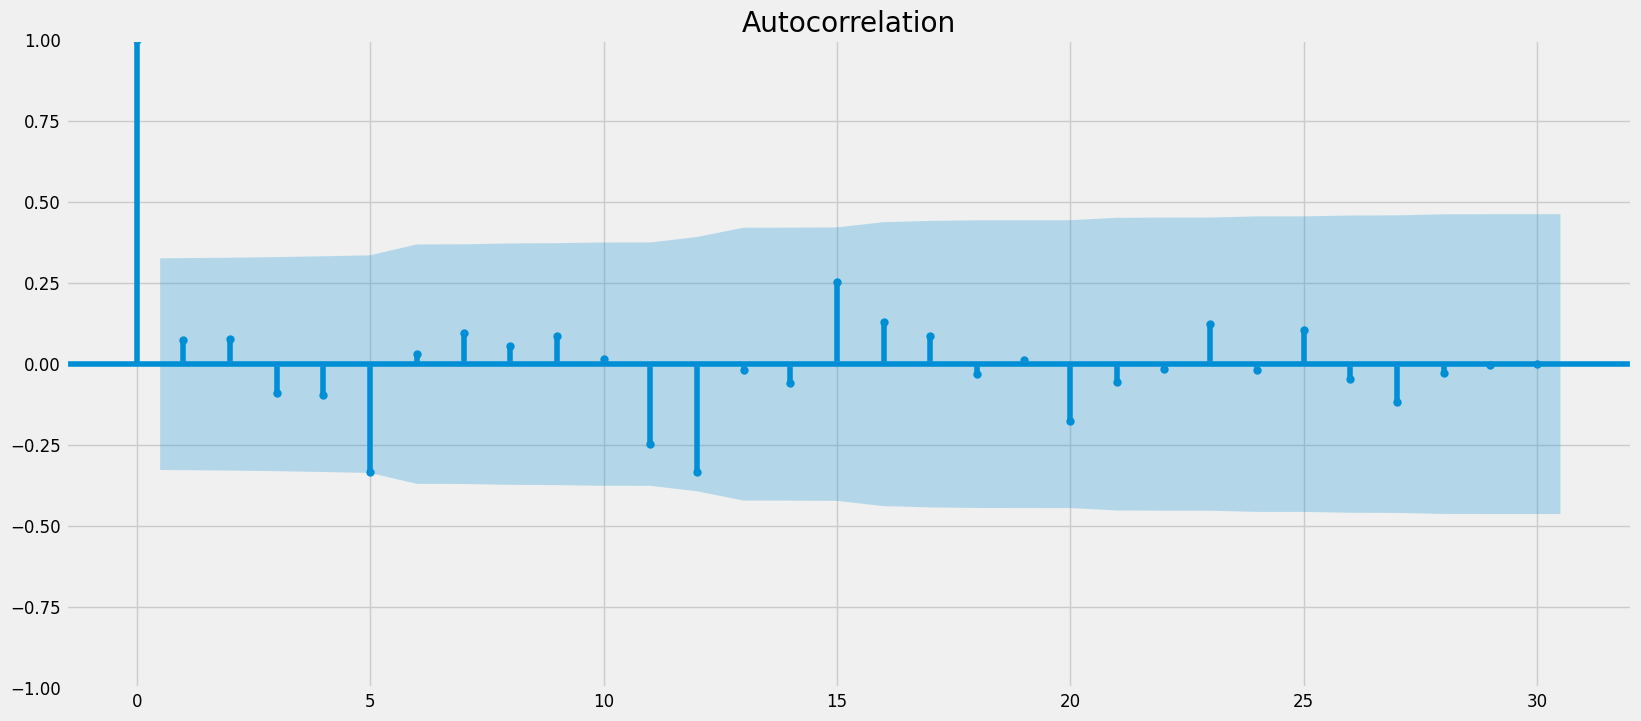

In [ ]:
sm.graphics.tsa.plot_acf(df2['First seasonal difference'].iloc[12:],lags=30);

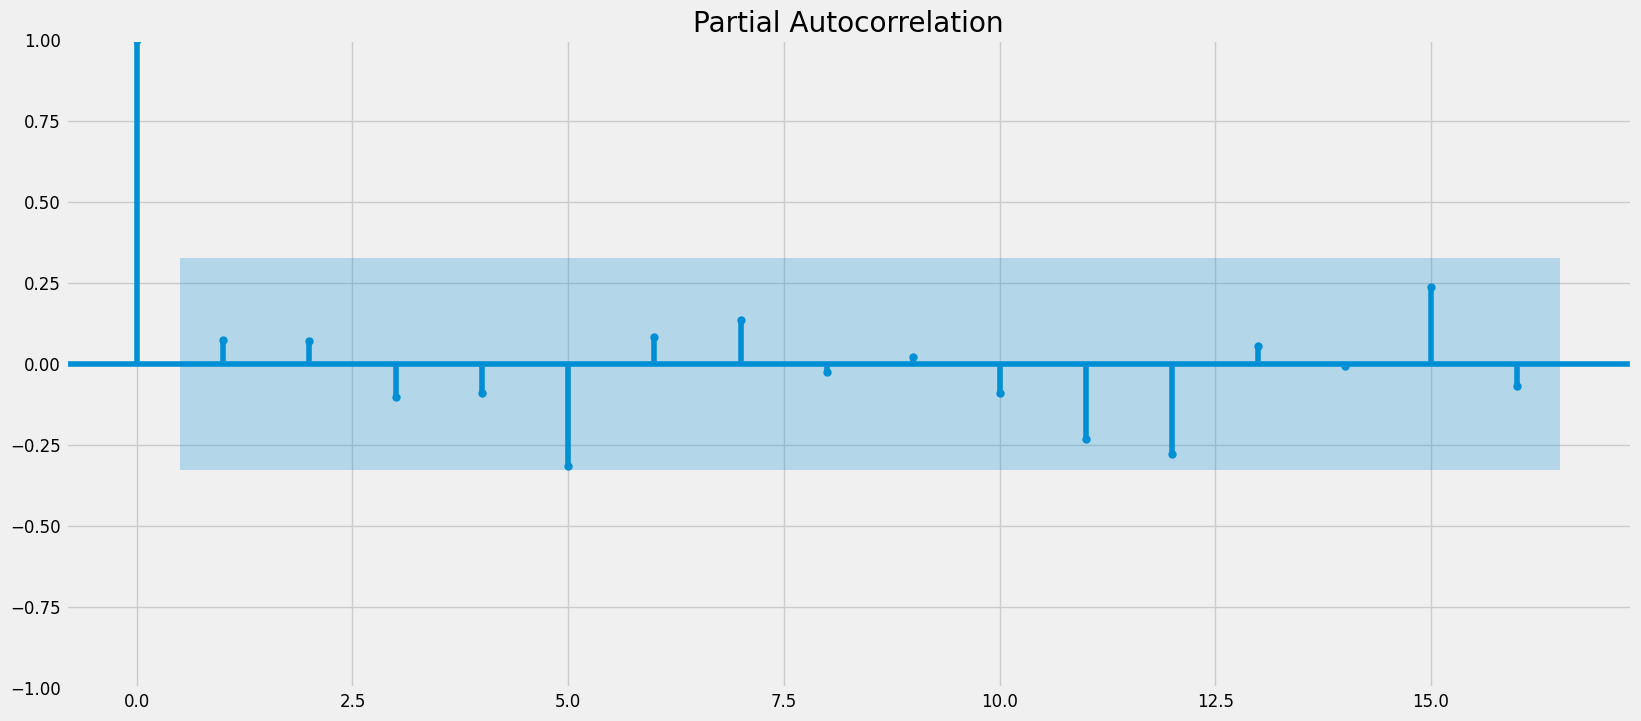

In [ ]:
sm.graphics.tsa.plot_pacf(df2['First seasonal difference'].iloc[12:],lags=16);

From PACF plot, using AR with lag 1 will be good for trend and AR with lag 0 for seasonality.

From ACF plot, MA with lag 1 will be good for trend and AR with lag 0 for seasonality.

**SARIMAX Model implementation:**

In [ ]:
#Generating Triplets
p = d = q = range(0, 2)
pdq = list(itertools.product(p, d, q))
print(pdq)

[(0, 0, 0), (0, 0, 1), (0, 1, 0), (0, 1, 1), (1, 0, 0), (1, 0, 1), (1, 1, 0), (1, 1, 1)]


In [ ]:
seasonal_pdq=[(0,0,0,12),
              (0,1,0,12)]  # to avaoid over fitting

**Train Test Split**

In [ ]:
train = x[:-8]
test = x[-8:]

In [ ]:
for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            mod = sm.tsa.statespace.SARIMAX(train,
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)
            results = mod.fit()
            print('ARIMA{}x{}12 - AIC:{}'.format(param, param_seasonal, results.aic))
        except:
            continue

ARIMA(0, 0, 0)x(0, 0, 0, 12)12 - AIC:635.7727456061251
ARIMA(0, 0, 0)x(0, 1, 0, 12)12 - AIC:373.39626556714455
ARIMA(0, 0, 1)x(0, 0, 0, 12)12 - AIC:595.5320612374735
ARIMA(0, 0, 1)x(0, 1, 0, 12)12 - AIC:362.1546005275952
ARIMA(0, 1, 0)x(0, 0, 0, 12)12 - AIC:563.7391618684755
ARIMA(0, 1, 0)x(0, 1, 0, 12)12 - AIC:376.6474385554163
ARIMA(0, 1, 1)x(0, 0, 0, 12)12 - AIC:535.5541091101757
ARIMA(0, 1, 1)x(0, 1, 0, 12)12 - AIC:353.43909381976243
ARIMA(1, 0, 0)x(0, 0, 0, 12)12 - AIC:577.3172822206351
ARIMA(1, 0, 0)x(0, 1, 0, 12)12 - AIC:375.165706625653
ARIMA(1, 0, 1)x(0, 0, 0, 12)12 - AIC:553.2346775970645
ARIMA(1, 0, 1)x(0, 1, 0, 12)12 - AIC:364.04355620014996
ARIMA(1, 1, 0)x(0, 0, 0, 12)12 - AIC:558.5978427765548
ARIMA(1, 1, 0)x(0, 1, 0, 12)12 - AIC:371.16099924253007
ARIMA(1, 1, 1)x(0, 0, 0, 12)12 - AIC:536.1350558081033
ARIMA(1, 1, 1)x(0, 1, 0, 12)12 - AIC:355.2618811790495


###**Auto Regressive Integrated Moving Average (ARIMA) Model:**

ARIMA(p,d,q)

where, p = seasonality, d = trend, q = noise

Choosing the best p,d,q for ARIMA model

In [ ]:
p = d = q  = range(0, 2)
pdq = list(itertools.product(p,d,q))
seasonal_pdq = [(X[0], X[1], X[2], 12) for X in list(itertools.product(p, d, q))]
print('Examples of paramter combination for Seasonal ARIMA\n')
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[1]))
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[2]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[3]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[4]))

Examples of paramter combination for Seasonal ARIMA

SARIMAX: (0, 0, 1) x (0, 0, 1, 12)
SARIMAX: (0, 0, 1) x (0, 1, 0, 12)
SARIMAX: (0, 1, 0) x (0, 1, 1, 12)
SARIMAX: (0, 1, 0) x (1, 0, 0, 12)


**Lowest values combination is best i.e., SARIMAX(1, 1, 1)x(0, 1, 0, 12) has the lowest AIC value 355.26.**

**Substituting these values:**

In [ ]:
mod = sm.tsa.statespace.SARIMAX(train,
                                order=(1, 1, 1),
                                seasonal_order=(0, 1, 0, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False
                                 )
results = mod.fit()
print(results.summary().tables[1])

                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.1043      0.208      0.502      0.615      -0.303       0.511
ma.L1         -0.9098      0.195     -4.664      0.000      -1.292      -0.527
sigma2      6.541e+04   1.84e+04      3.558      0.000    2.94e+04    1.01e+05


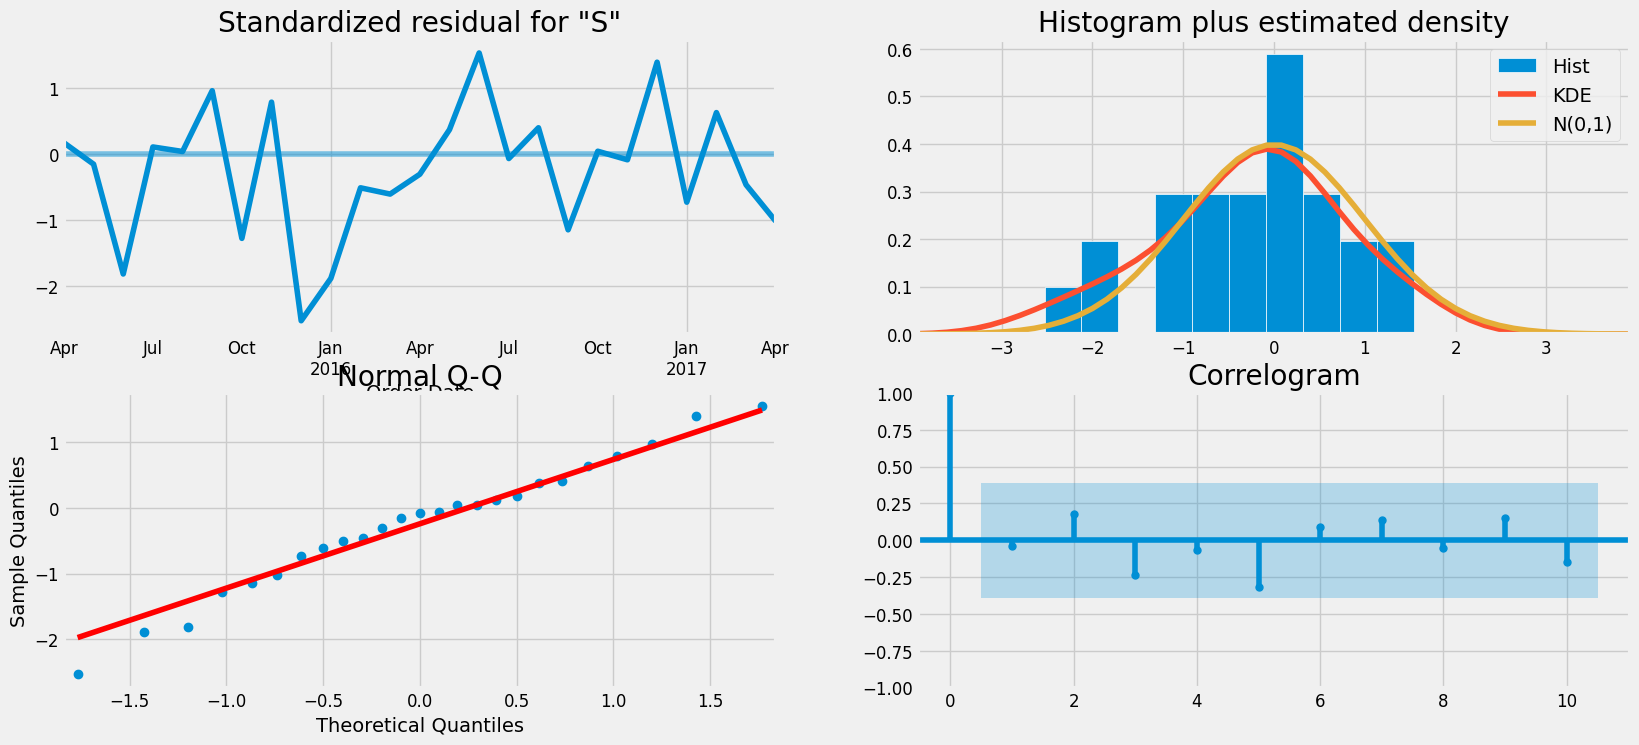

In [ ]:
# Model diagnostics
results.plot_diagnostics()
plt.show()

**Observations:**

The KDE plot almost coinicdes with N(0,1) plot indicating it is normally distributed.

The Residuals are not correlated and normally distributed with zero-mean and qq-plot on the bottom left shows that the ordered distribution of residuals (blue dots).

The correlogram plot on the bottom right, which shows that the time series residuals have low correlation with lagged versions of itself.




###**Validating the model**

In [ ]:
pred=results.get_forecast(steps=8)
pred_ci=pred.conf_int()

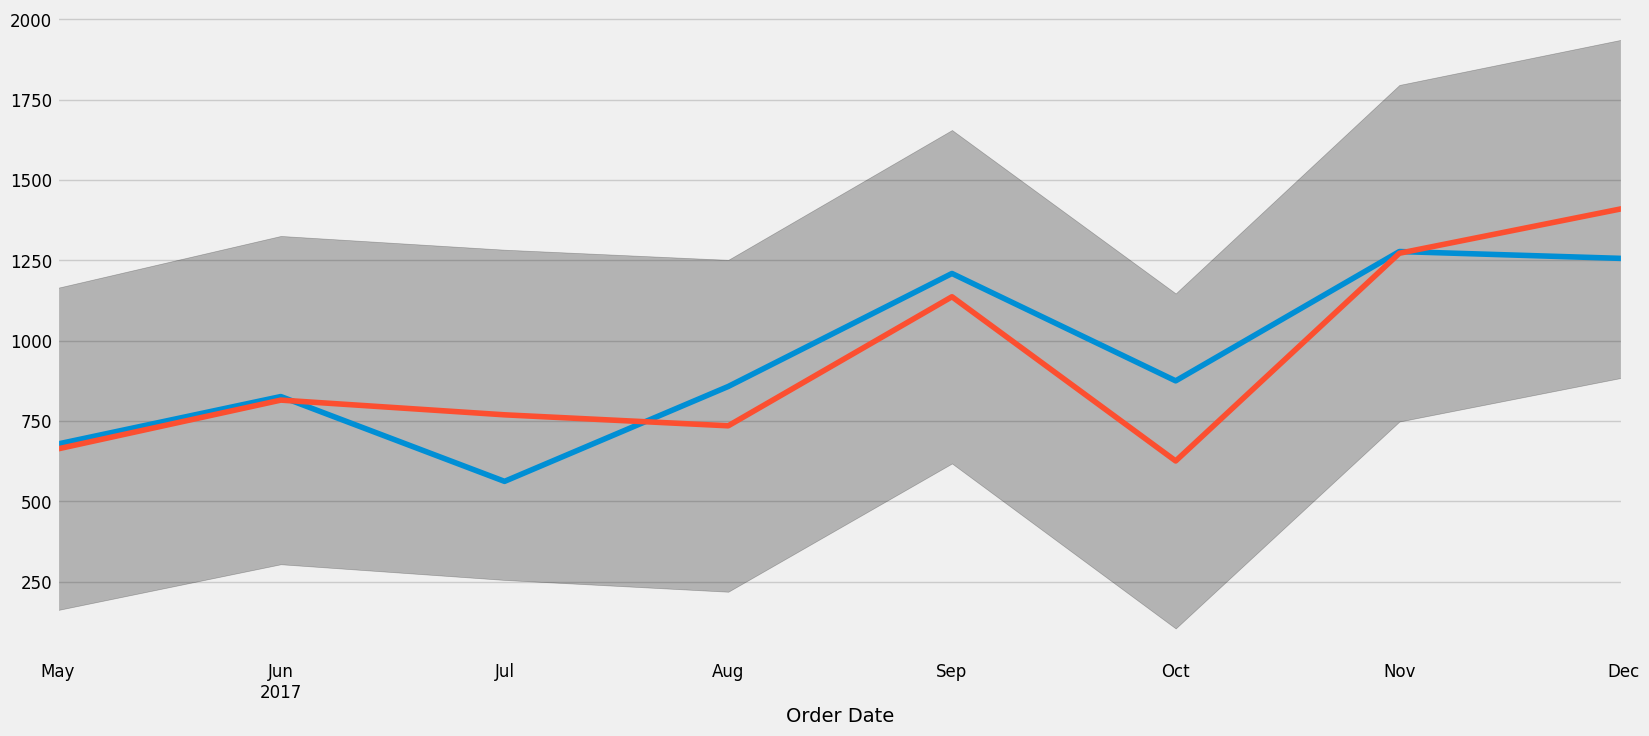

In [ ]:
ax=test.plot(label='Observed')
pred.predicted_mean.plot(ax=ax,label='Predicted')
ax.fill_between(pred_ci.index,pred_ci.iloc[:,0],pred_ci.iloc[:,1],color='k',alpha=.25);

The results are clearly within the confidence level and so the model is appropriate.

###**Root Mean Squared Error (RMSE)**

In [ ]:
print(x.min())
print(x.max())

356.8682727272727
1532.2983250000002


In [ ]:
test_forecast=pred.predicted_mean
mse_forecast=((test-test_forecast)**2).mean()
print('RMSE = {}'.format(np.sqrt(mse_forecast)))

RMSE = 136.87259345321772


With the minimum and maximum values as the above, rmse with 136 is fine.

###**Model Future Forecasting**

In [ ]:
mod_final=sm.tsa.statespace.SARIMAX(x,order=(1,1,1),seasonal_order=(1,1,1,12),enforce_stationarity=False,enforce_invertibility=False)

In [ ]:
results_f=mod_final.fit()
pred_f=results_f.get_forecast(steps=50)
pred_f_ci=pred_f.conf_int()

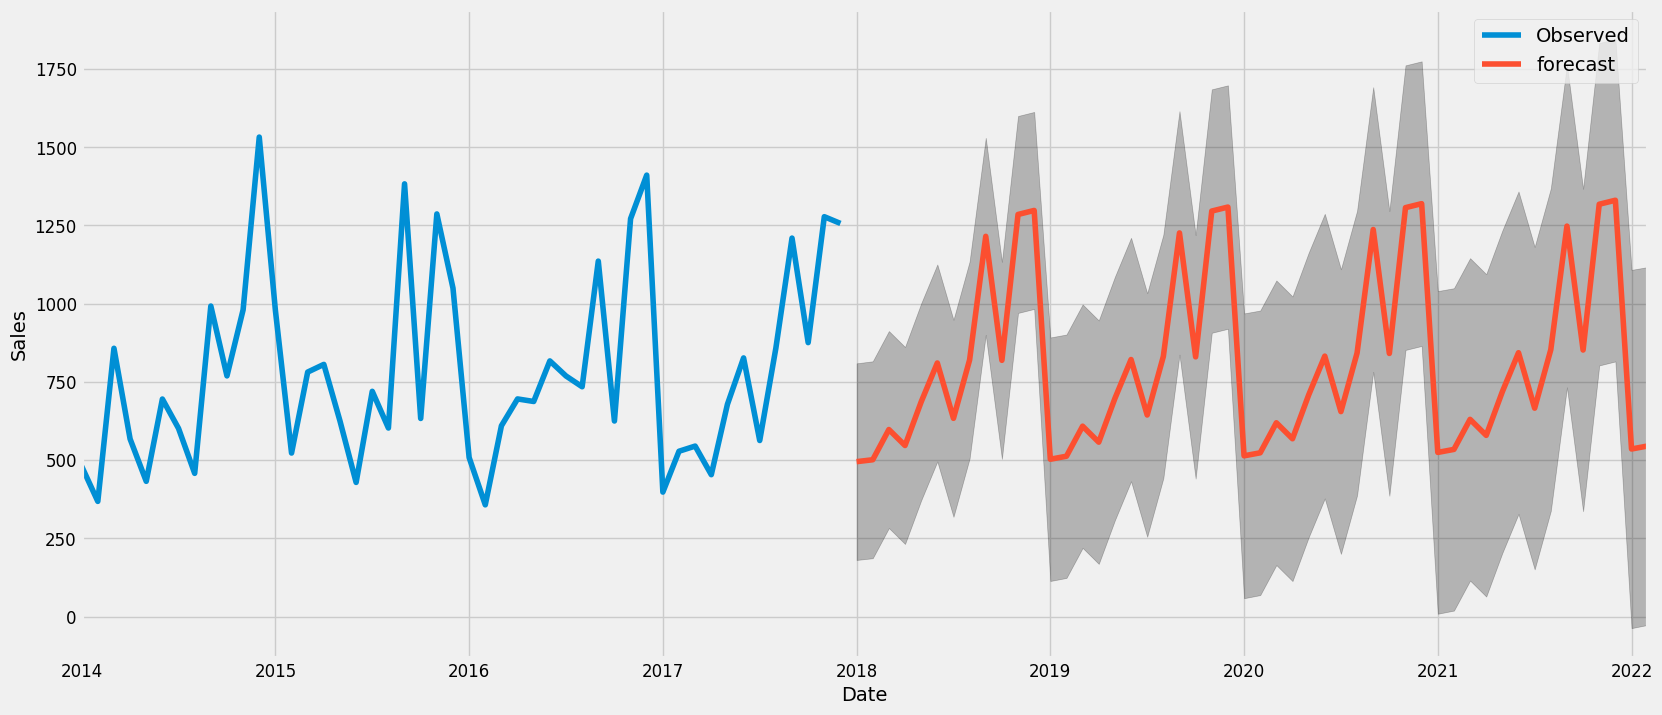

In [ ]:
ax=x.plot(label='Observed')
pred_f.predicted_mean.plot(ax=ax,label='forecast')
ax.fill_between(pred_f_ci.index,pred_f_ci.iloc[:,0],pred_f_ci.iloc[:,1],color='k',alpha=.25)
ax.set_xlabel('Date')
ax.set_ylabel('Sales')
plt.legend()
plt.show();

In [ ]:
y_f=pred_f.predicted_mean

In [ ]:
y_f

2018-01-01     494.930399
2018-02-01     501.008238
2018-03-01     597.573807
2018-04-01     546.591922
2018-05-01     686.004141
2018-06-01     810.313151
2018-07-01     633.361761
2018-08-01     820.094715
2018-09-01    1215.114465
2018-10-01     818.713715
2018-11-01    1284.965481
2018-12-01    1297.848246
2019-01-01     502.664376
2019-02-01     512.309491
2019-03-01     608.293319
2019-04-01     557.195620
2019-05-01     696.910180
2019-06-01     821.304429
2019-07-01     644.043045
2019-08-01     831.163086
2019-09-01    1226.028203
2019-10-01     829.849300
2019-11-01    1295.873725
2019-12-01    1308.633899
2020-01-01     513.570531
2020-02-01     523.202934
2020-03-01     619.188836
2020-04-01     568.091549
2020-05-01     707.805031
2020-06-01     832.198977
2020-07-01     654.938698
2020-08-01     842.057359
2020-09-01    1236.923027
2020-10-01     840.743334
2020-11-01    1306.768569
2020-12-01    1319.529179
2021-01-01     524.465382
2021-02-01     534.097831
2021-03-01  

**This is the forecasted values from 2018 to 2022.**

In [ ]:
y_f.to_csv('Furniture Sales Predictions.csv')

**Conclusion:**

The model captures the trend,seasonality.

The forecast data aligns with the actual values mostly.

The confidence intervals(the darkened region on graphs) grew larger as we moved further into the future.

The sales are low at the beginning of every year but at peaks at the end of the year.